# Random Forest 

In this example, I'm asking **which features are driving the differences between the negcons and treatments for each day: 1, 15 and 30 days of treatment**.

For this:

### 1. Import the functions, define some inputs, and import profiles;
### 2. Run Random Forest in a loop + evaluation
    - Consider that your dataframe has subgroups by which you want to slice the df before calculating the random forest model. 
    - If not your case, go to 3. 
### 3. Run Random Forest + evaluation
### 4. Save shap values and features to df and export

# 1. Imports

In [79]:
import pandas as pd
import easygui as eg
import numpy as np
import sys
import os

sys.path.append(r"C:\Users\Fer\Documents\GitHub") #add here the path in your computer to scripts_notebooks_fossa

from scripts_notebooks_fossa.machine_learning import random_forest_utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- Define some variables that will be used later in the notebook

In [83]:
experiment = "time_negcons_vs_treatments"
project = "2022_06_05_CellPainting"
timepoints = [1,15,30]

In [2]:
myfile = eg.fileopenbox(msg="Choose a file", default=r"F:")
print('Filename', myfile)
df = pd.read_csv(myfile)
df.head()

Filename F:\2023_01_04_AgNPContinuousAcute_fossa_Cimini\workspace\profiles\2022_06_05_CellPainting\2022_06_05_CellPainting_normalized_negcon_time_feature_select_pycombat_plates.csv


,Metadata_Compound_concentration,Metadata_Plate,Metadata_Well,Metadata_cell_count,Metadata_plate_map_name,Metadata_Compound,Metadata_NPSize_nm,Metadata_Cell,Metadata_Time,Metadata_Concentration_mgml,...,Nuclei_Texture_SumAverage_AGP_20_01_256,Nuclei_Texture_SumEntropy_DNA_20_03_256,Nuclei_Texture_SumEntropy_Mito_10_00_256,Nuclei_Texture_SumVariance_DNA_20_02_256,Nuclei_Texture_SumVariance_DNA_20_03_256,Nuclei_Texture_SumVariance_ER_10_00_256,Nuclei_Texture_SumVariance_Mito_20_01_256,Nuclei_Texture_Variance_ER_20_02_256,Nuclei_Texture_Variance_ER_20_03_256,Nuclei_Texture_Variance_Mito_20_00_256
0,Non-treated_0_30,220605_085428_Plate_1,B10,543,platemap_rep1,Non-treated,0,Huh7,30,0.0,...,0.666943,0.514651,0.418927,-0.510063,0.093691,-0.326963,-1.129765,-1.907206,-0.500610,-1.218512
1,Non-treated_0_30,220605_085428_Plate_1,B11,453,platemap_rep1,Non-treated,0,Huh7,30,0.0,...,0.183475,0.020484,-0.422209,0.004693,0.018143,0.194013,-0.862310,-0.358561,0.864939,-1.101234
2,Non-treated_0_1,220605_085428_Plate_1,B2,669,platemap_rep1,Non-treated,0,Huh7,1,0.0,...,1.871568,0.020484,5.520379,0.135718,0.093691,0.194013,2.941955,-1.907206,-0.006185,1.495709
3,Non-treated_0_1,220605_085428_Plate_1,B3,672,platemap_rep1,Non-treated,0,Huh7,1,0.0,...,0.459703,-4.405884,-0.335352,-5.728848,-5.342787,-1.017251,-1.129765,-6.103227,-2.804204,-1.101234
4,Non-treated_0_1,220605_085428_Plate_1,B4,630,platemap_rep1,Non-treated,0,Huh7,1,0.0,...,1.150411,0.514651,3.237589,0.519450,0.776609,2.173136,0.613227,3.760048,3.587757,0.129134


# 2. Run Random Forest in a loop + evaluation

Looping through Metadata_Time = 1.
All the scores from cross_val_score: [0.8 1.  1.  1.  1. ]
0.96 accuracy with a standard deviation of 0.08
Classic: Accuracy of Decision Tree classifier on training set: 1.00
Classic: Accuracy of Decision Tree classifier on test set: 0.75


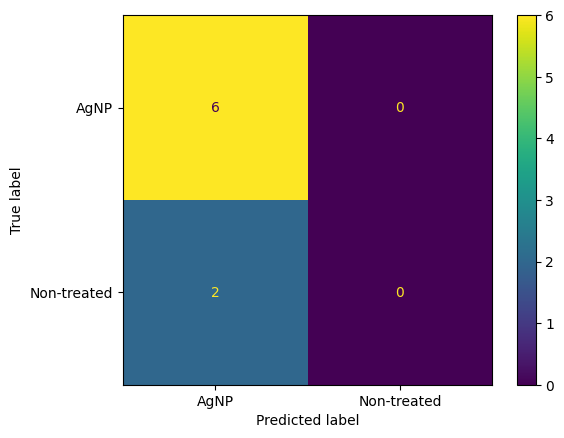

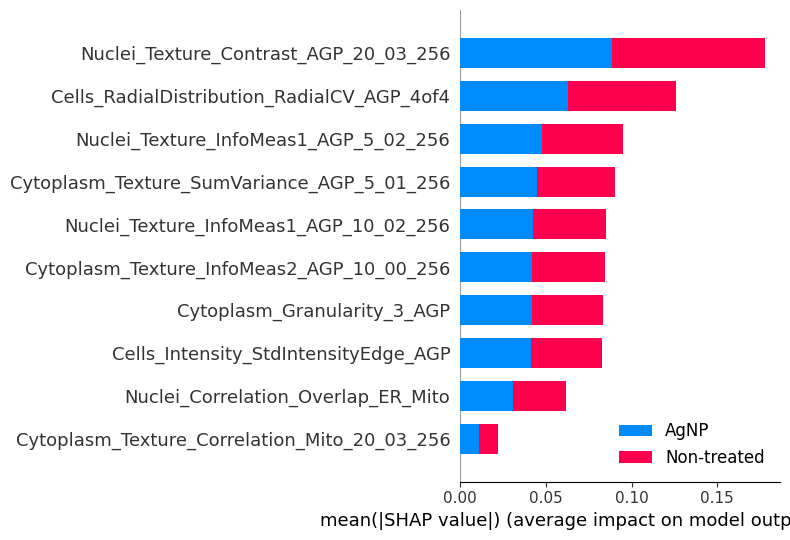

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


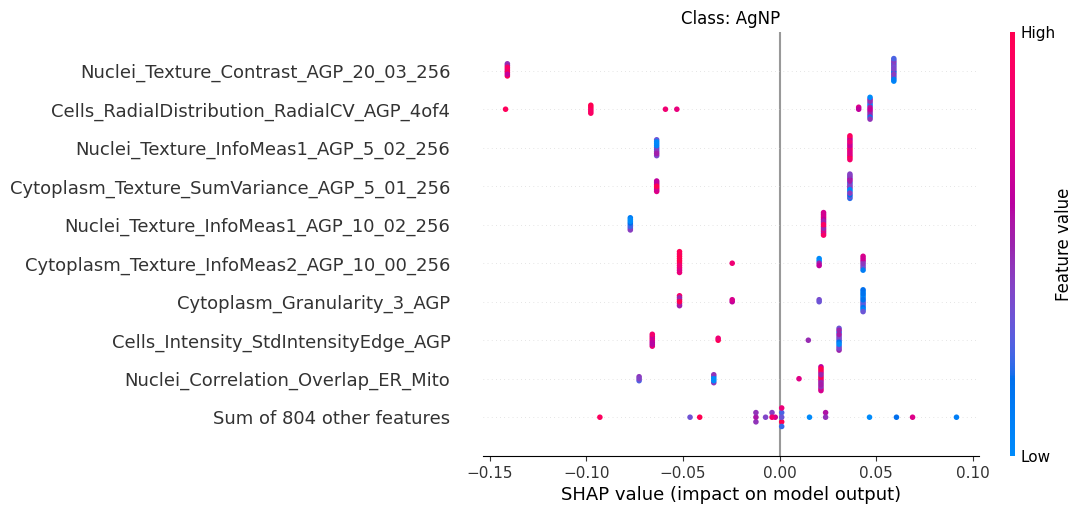

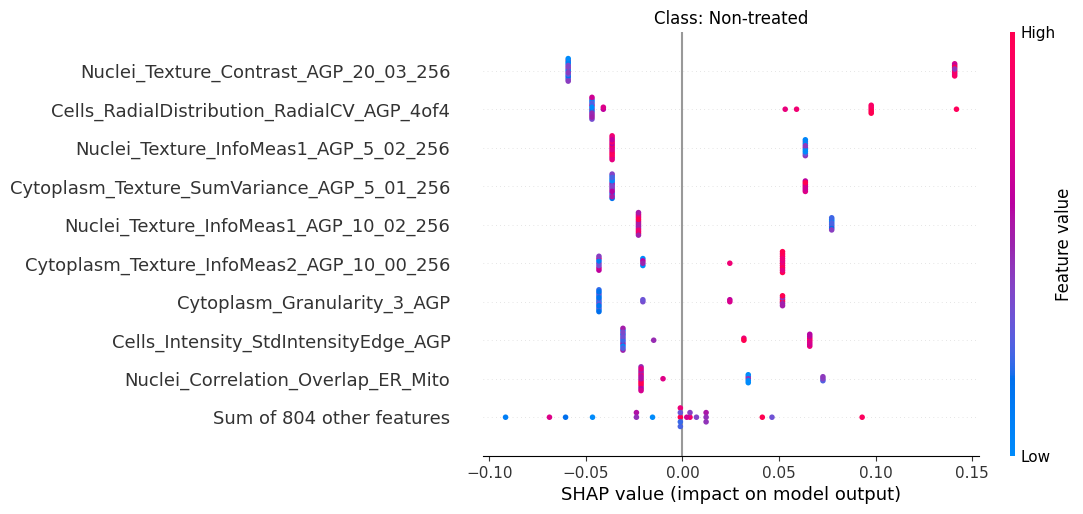

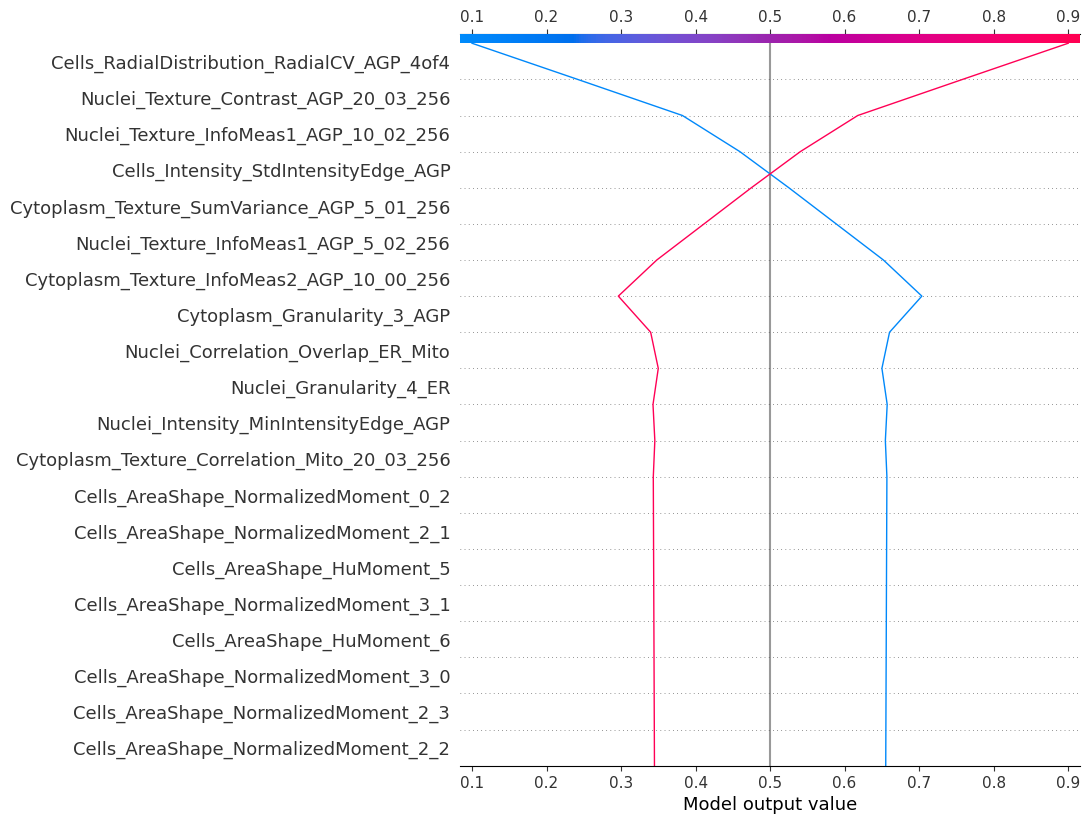

Looping through Metadata_Time = 15.
All the scores from cross_val_score: [0.8  0.6  0.75 1.   0.5 ]
0.73 accuracy with a standard deviation of 0.17
Classic: Accuracy of Decision Tree classifier on training set: 1.00
Classic: Accuracy of Decision Tree classifier on test set: 0.75


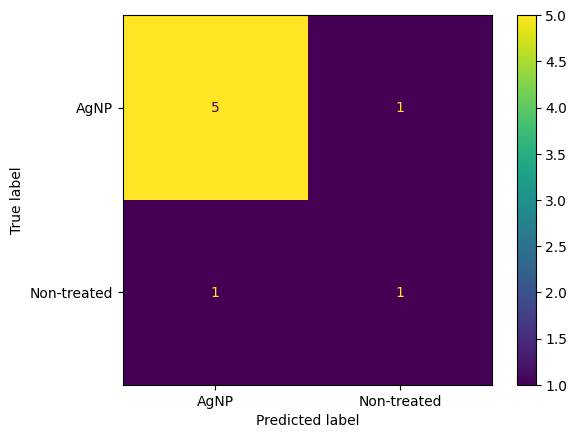

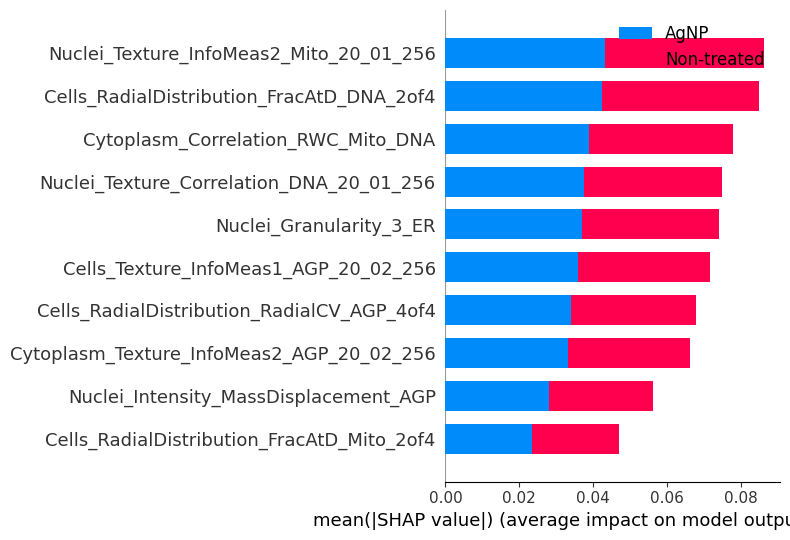

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


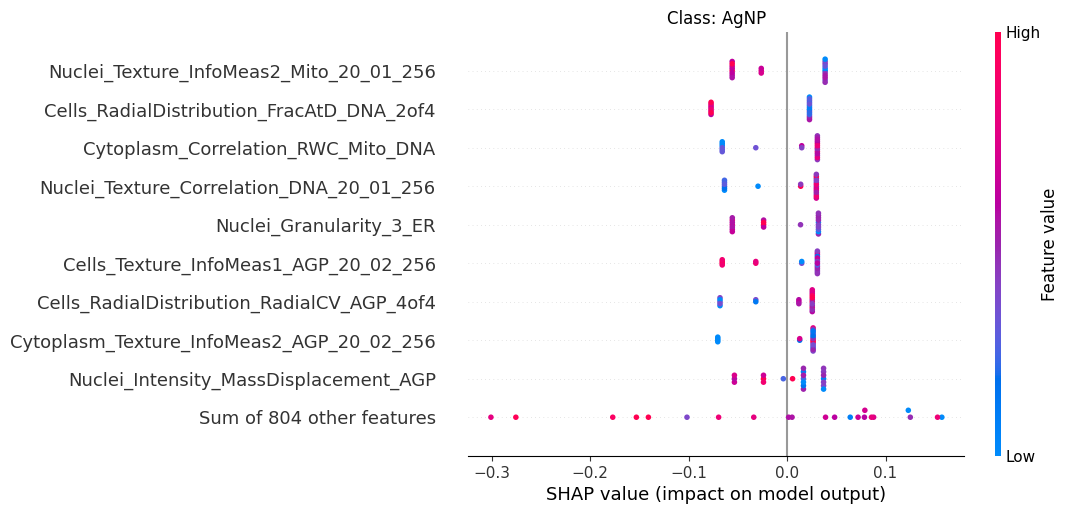

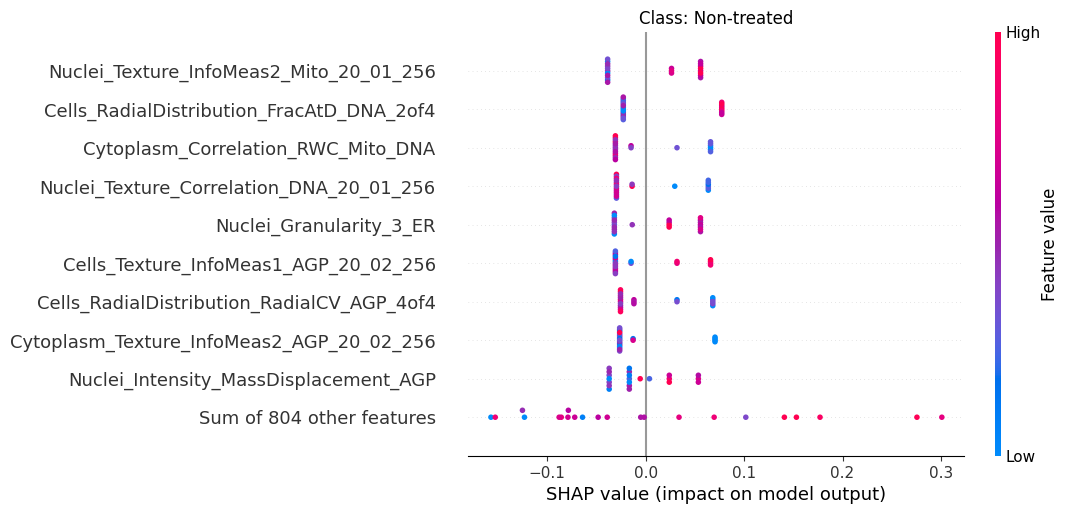

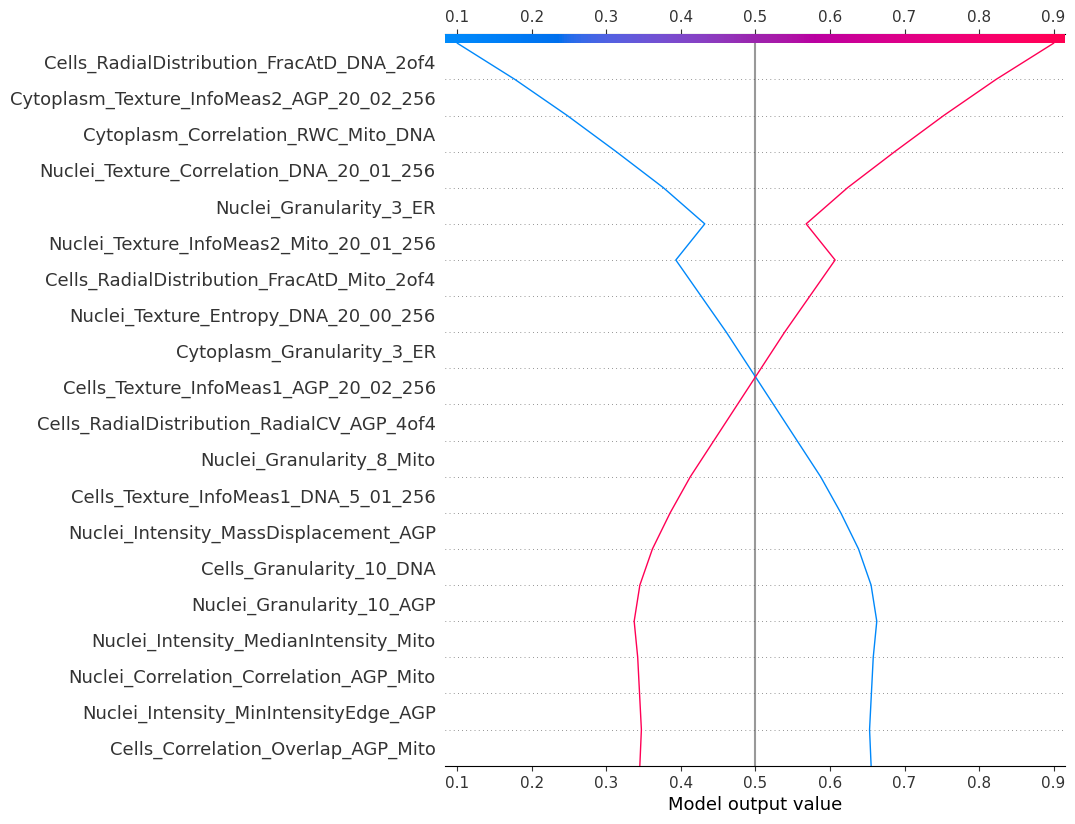

Looping through Metadata_Time = 30.
All the scores from cross_val_score: [0.8  1.   0.75 0.75 0.5 ]
0.76 accuracy with a standard deviation of 0.16
Classic: Accuracy of Decision Tree classifier on training set: 0.95
Classic: Accuracy of Decision Tree classifier on test set: 0.88


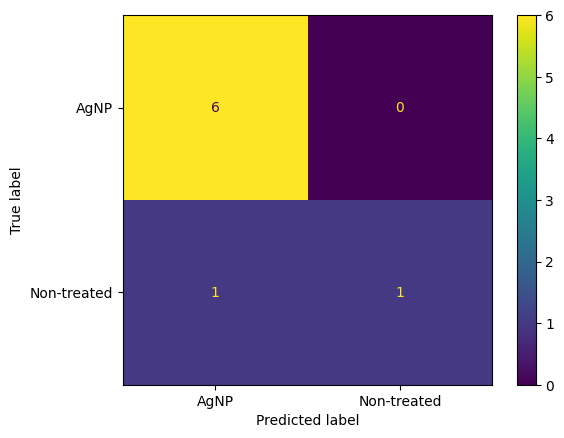

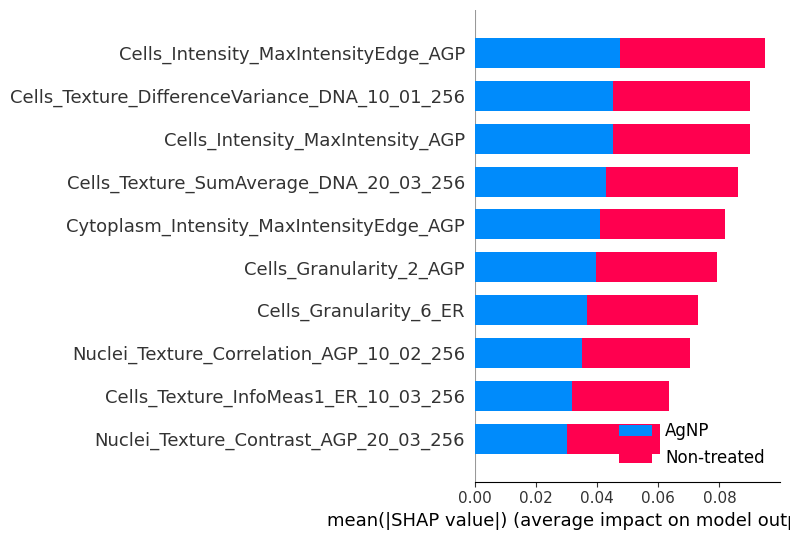

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


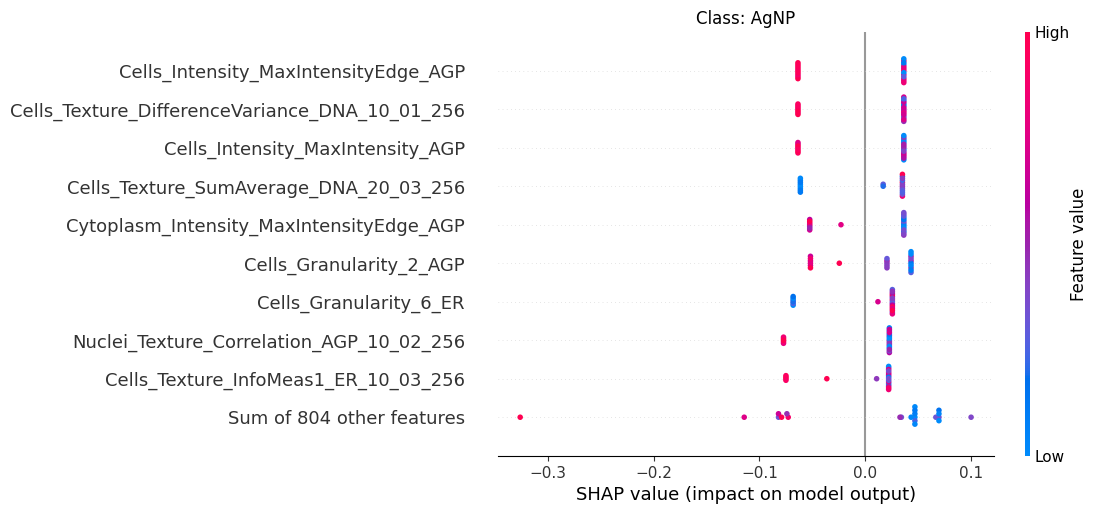

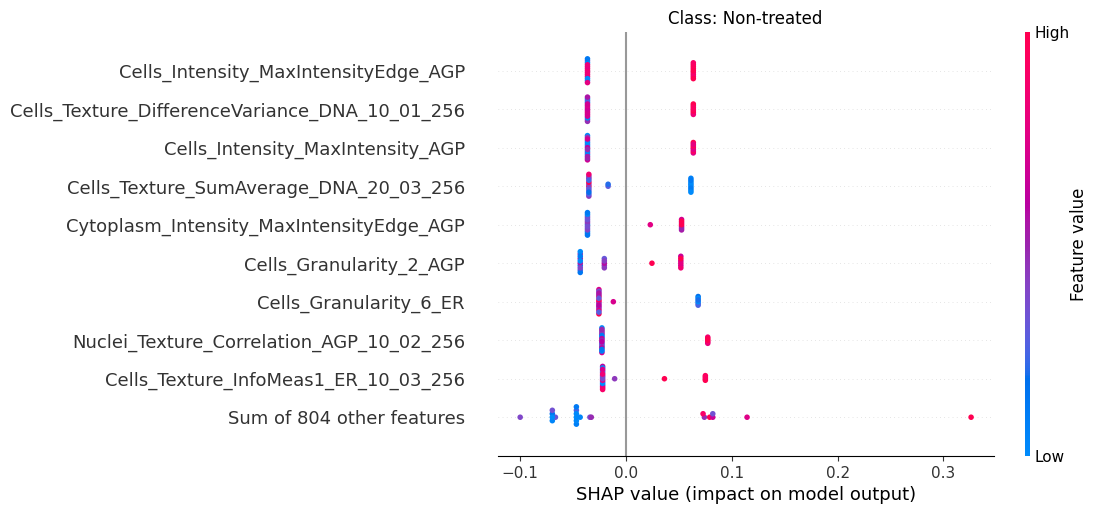

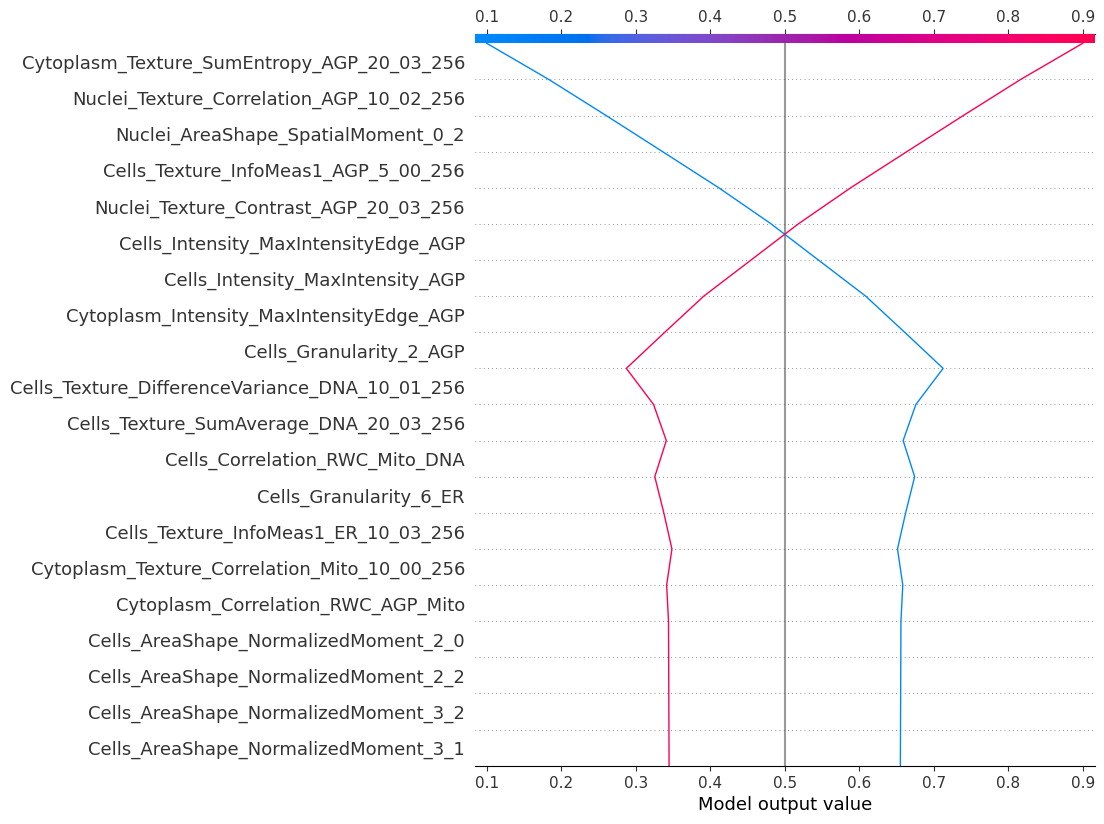

In [4]:
random_forest_utils.loop_random_forest_model_eval(df, target = "Metadata_Compound", column_to_loop = "Metadata_Time", list_to_loop = timepoints)

# 3. Run Random Forest + evaluation 



## For individual timepoint

Run for one at a time to take a better look, change parameters, etc

**Comment the `slice` line to run for the full dataframe**. The default for this function is `slice=False`.

All the scores from cross_val_score: [0.8 1.  1.  1.  1. ]
0.96 accuracy with a standard deviation of 0.08
Classic: Accuracy of Decision Tree classifier on training set: 1.00
Classic: Accuracy of Decision Tree classifier on test set: 0.75


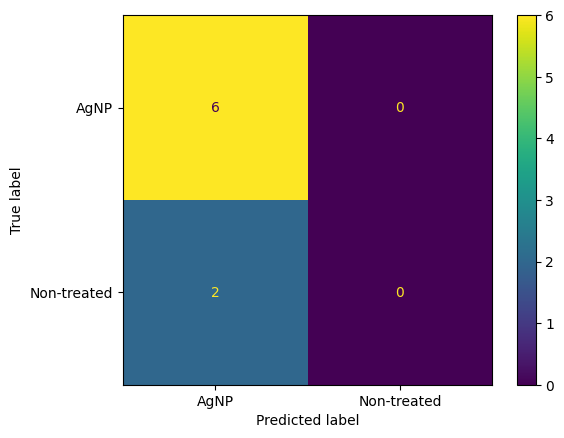

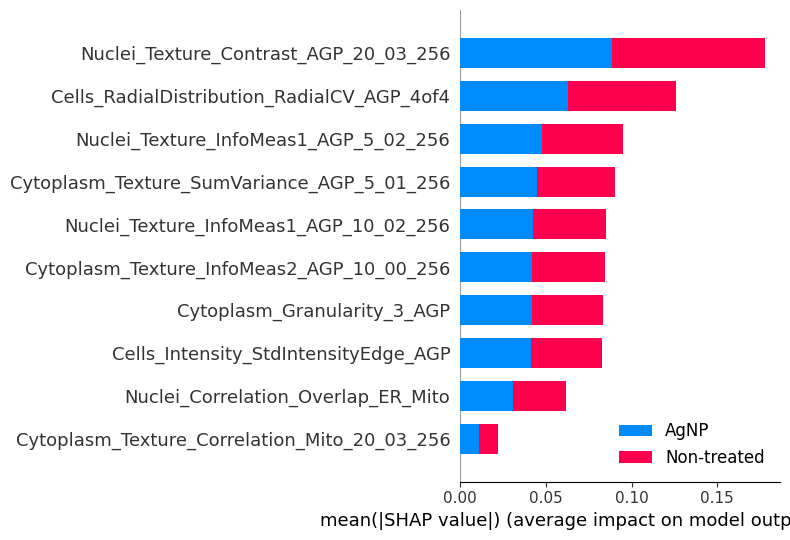

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


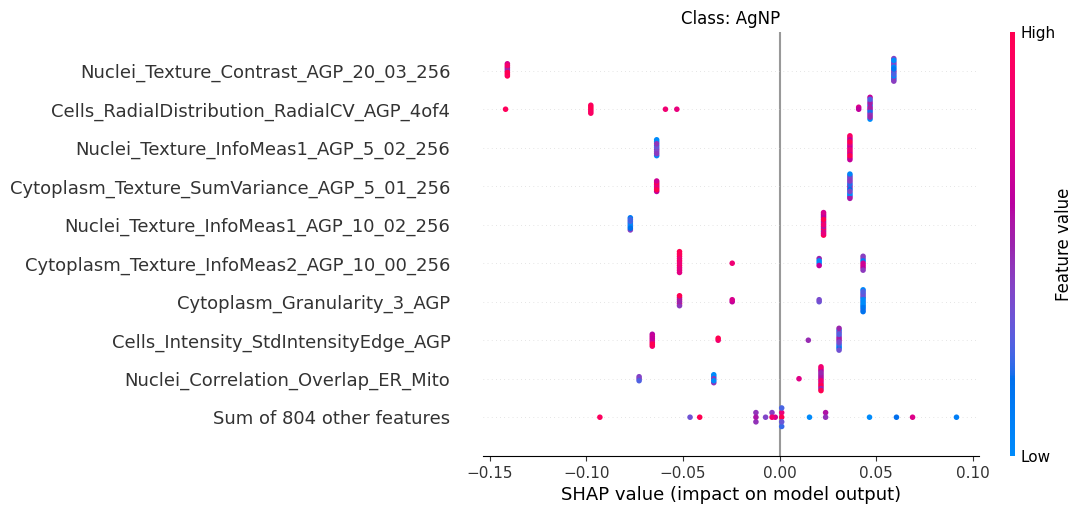

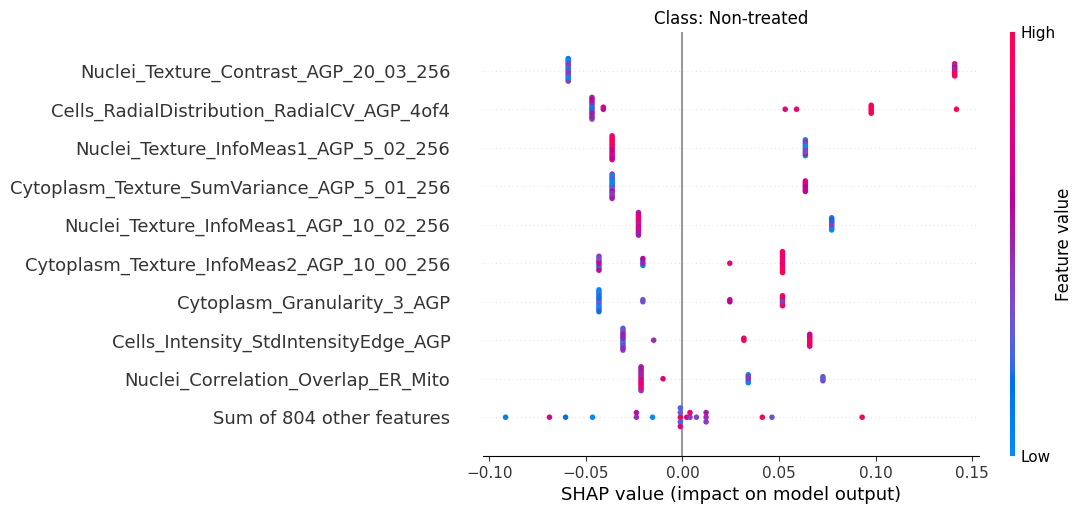

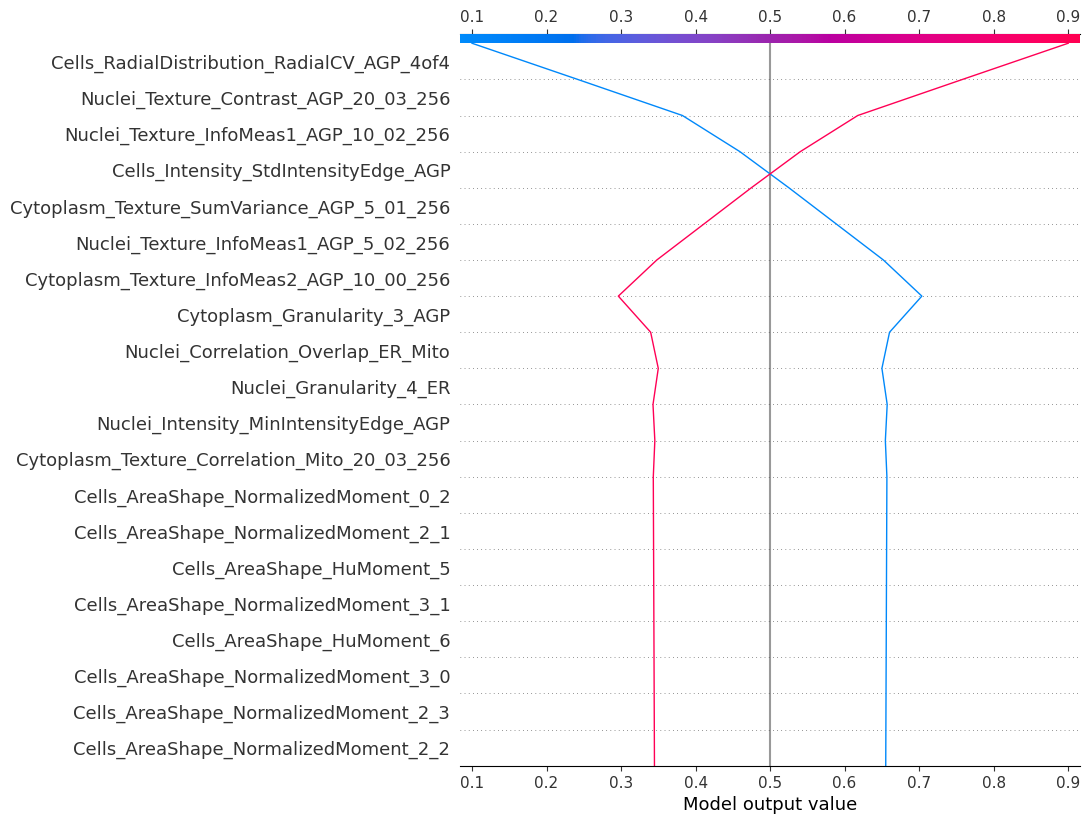

In [3]:
shap_values, X_train, model = random_forest_utils.random_forest_model_eval(df, 
                                                                    target = "Metadata_Compound", 
                                                                    ccp = 0.08, 
                                                                    n_estimators=10, 
                                                                    max_depth=5, 
                                                                    slice = True, column_slice = "Metadata_Time", slice_to_value = 1
                                                                    )

## Loop

Run in a for loop to all timepoints, so the dataframe will be sliced to each timepoint, run the model, plot the evaluations, and save the shap values at the end.

We are saving the shap values + features to a dataframe to have a way to retrieve the feature importance for each class and timepoint later.

Looping through Metadata_Time = 1.
All the scores from cross_val_score: [0.8 1.  1.  1.  1. ]
0.96 accuracy with a standard deviation of 0.08
Classic: Accuracy of Decision Tree classifier on training set: 1.00
Classic: Accuracy of Decision Tree classifier on test set: 0.75


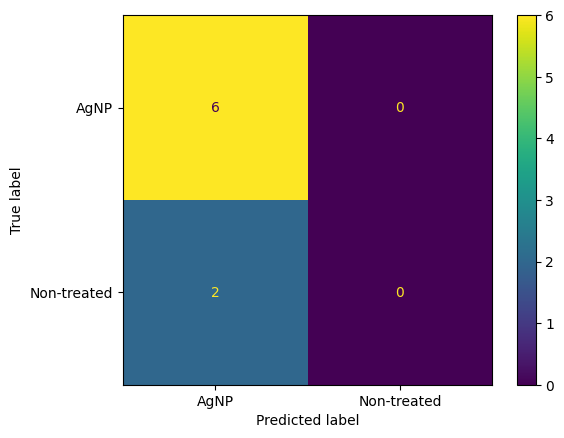

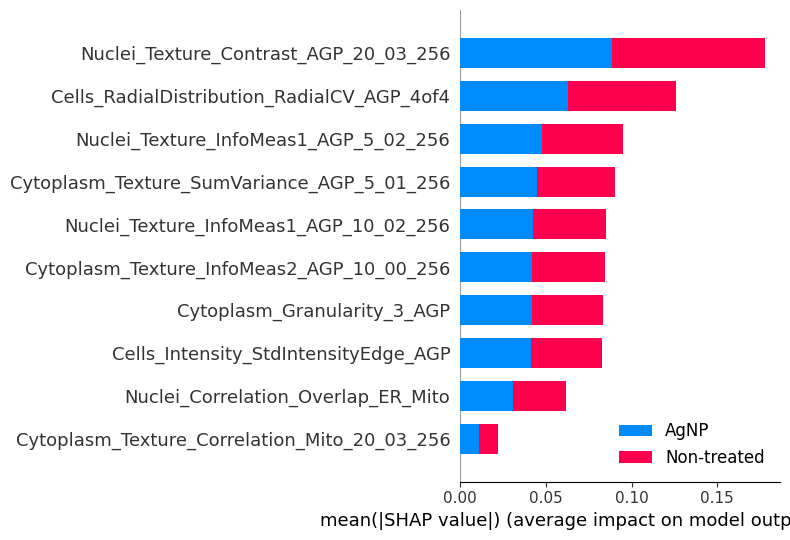

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


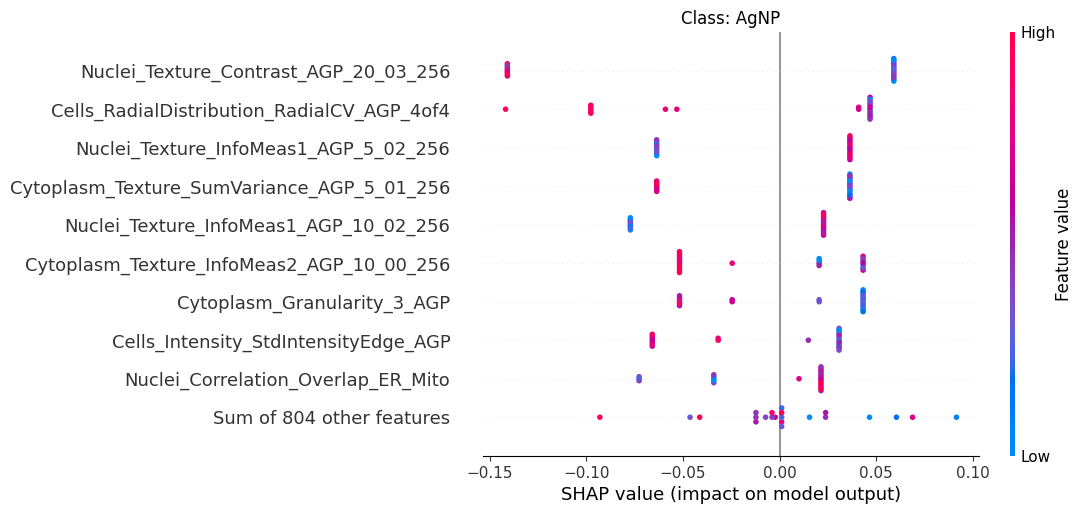

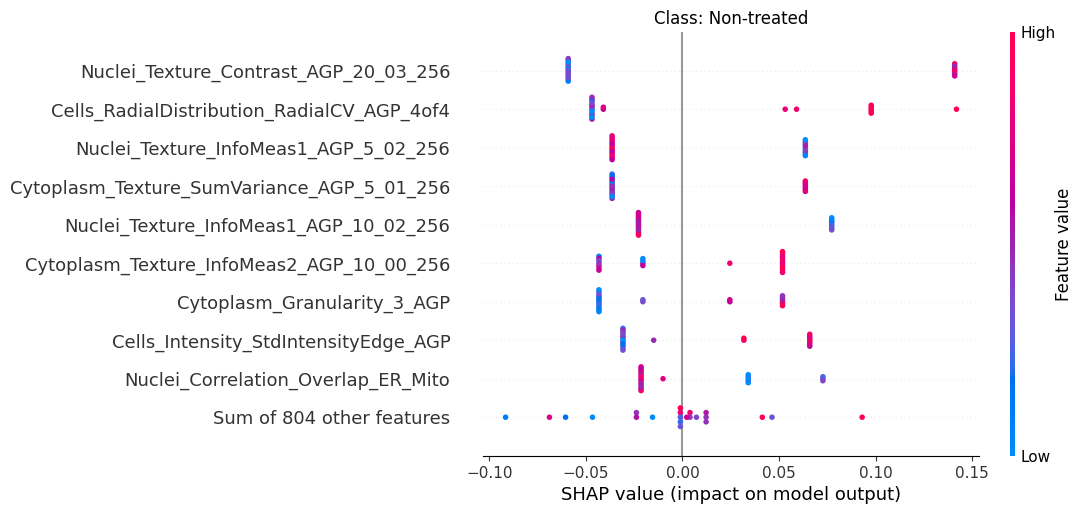

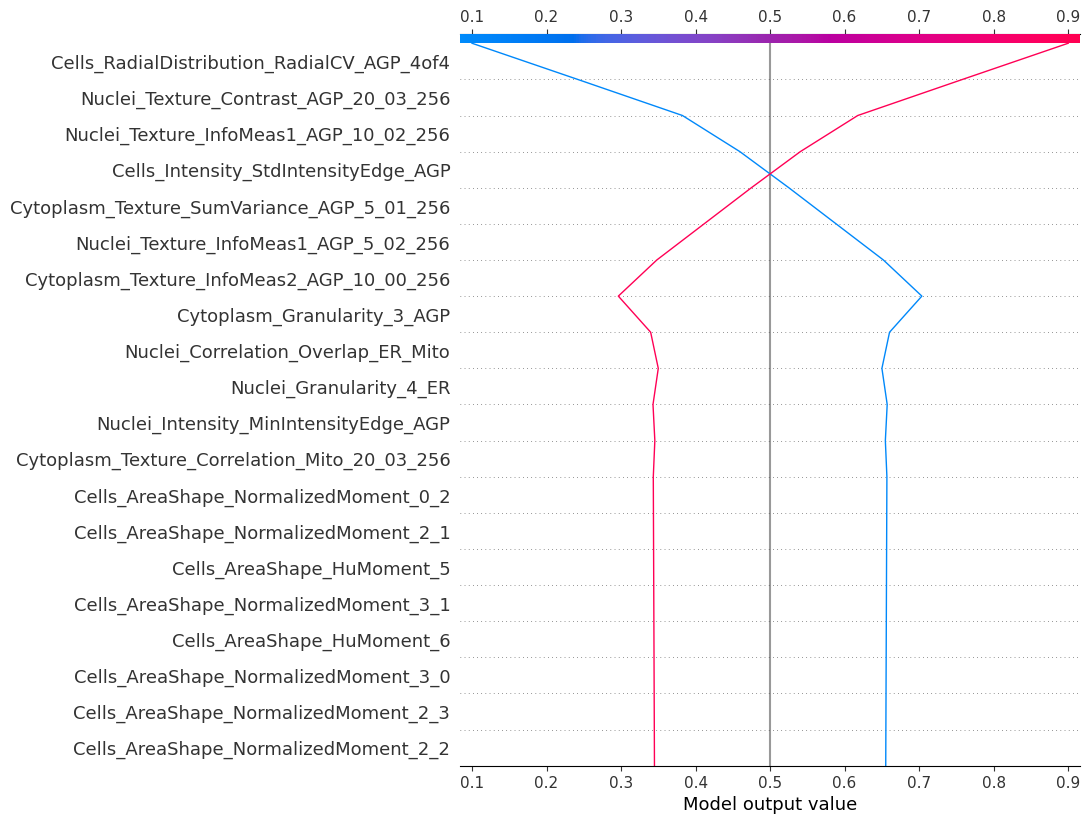

Looping through Metadata_Time = 15.
All the scores from cross_val_score: [0.8  0.6  0.75 1.   0.5 ]
0.73 accuracy with a standard deviation of 0.17
Classic: Accuracy of Decision Tree classifier on training set: 1.00
Classic: Accuracy of Decision Tree classifier on test set: 0.75


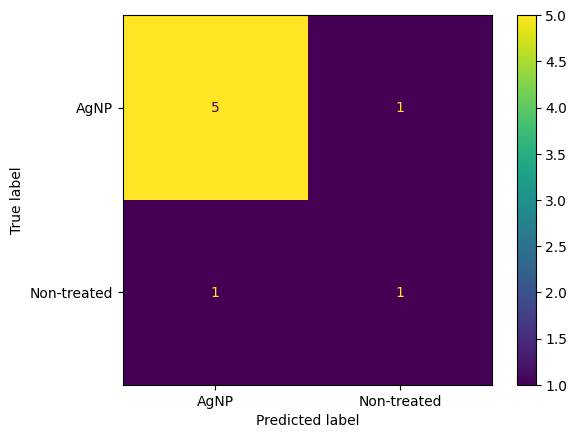

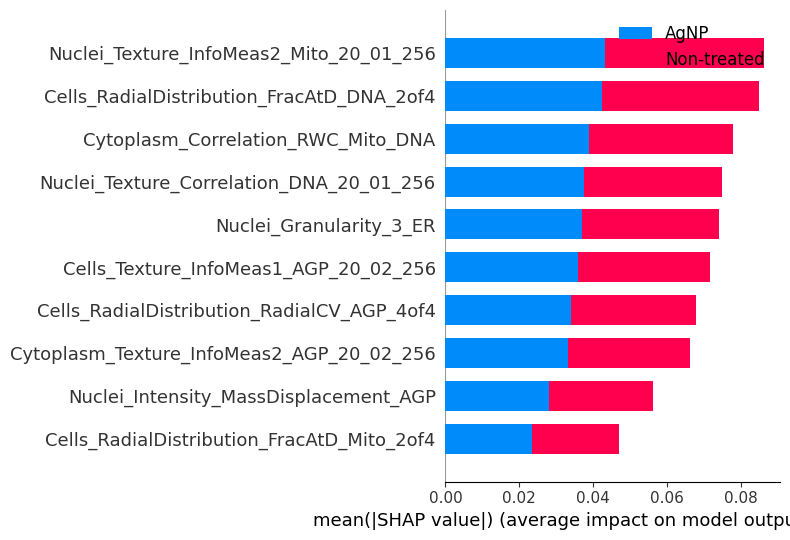

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


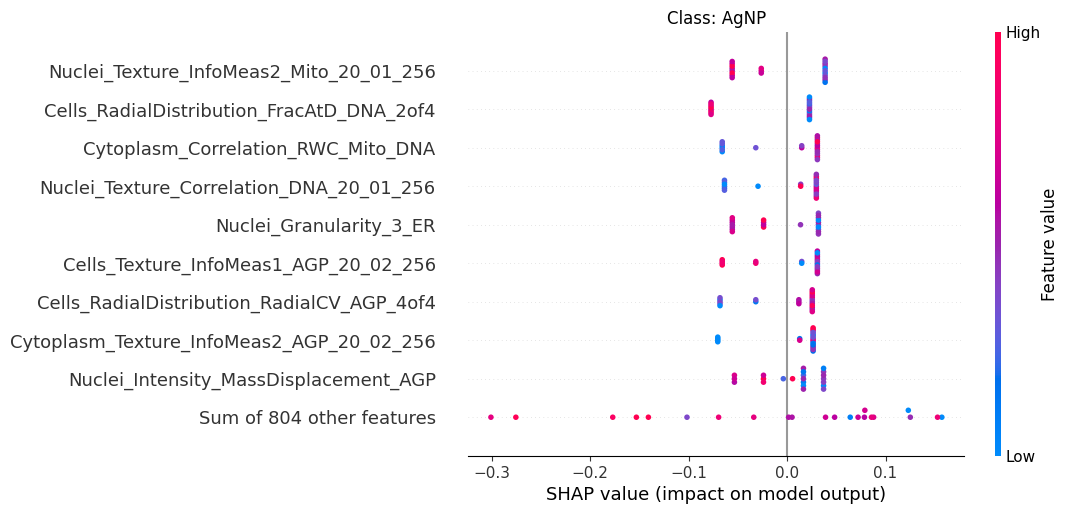

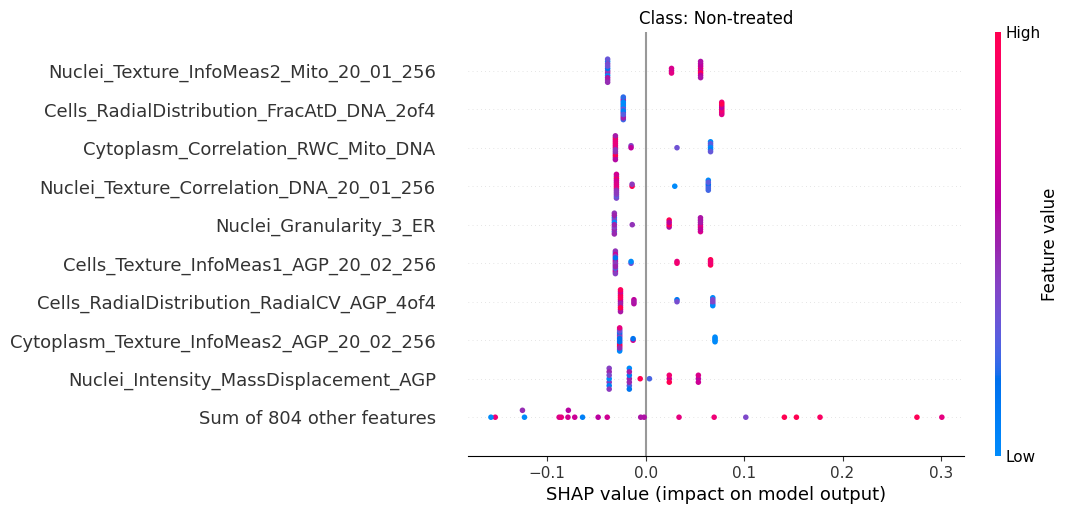

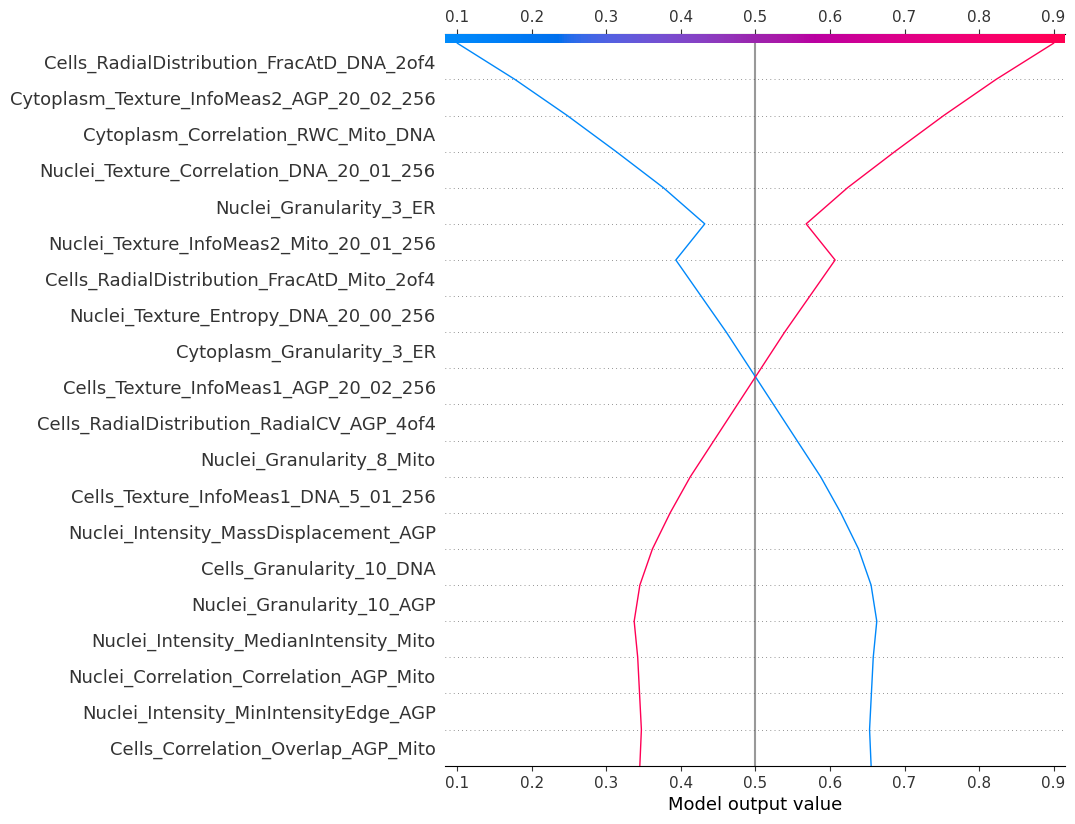

Looping through Metadata_Time = 30.
All the scores from cross_val_score: [0.8  1.   0.75 0.75 0.5 ]
0.76 accuracy with a standard deviation of 0.16
Classic: Accuracy of Decision Tree classifier on training set: 0.95
Classic: Accuracy of Decision Tree classifier on test set: 0.88


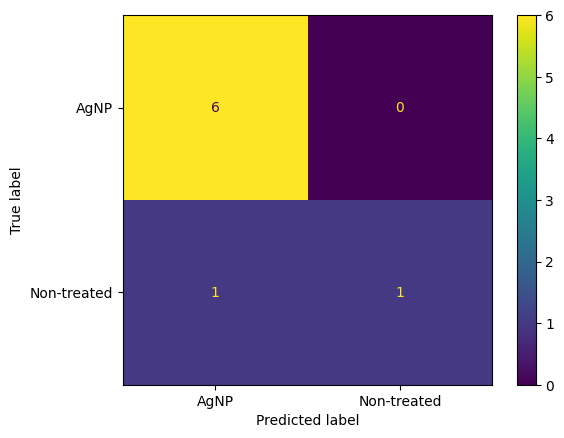

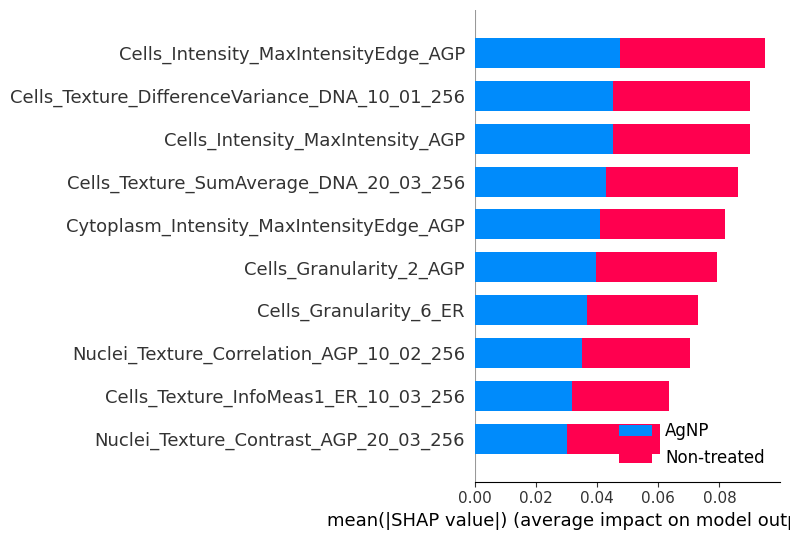

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


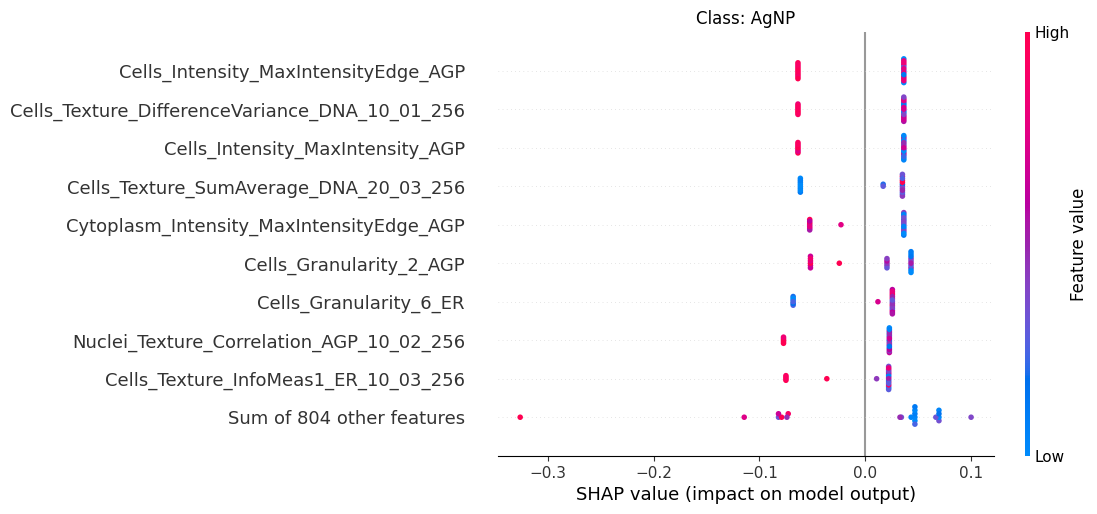

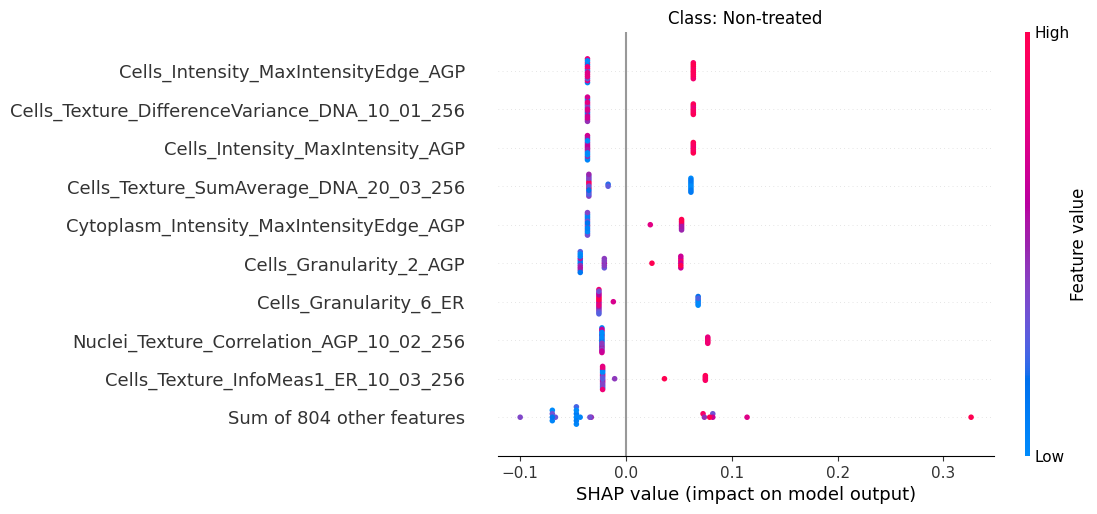

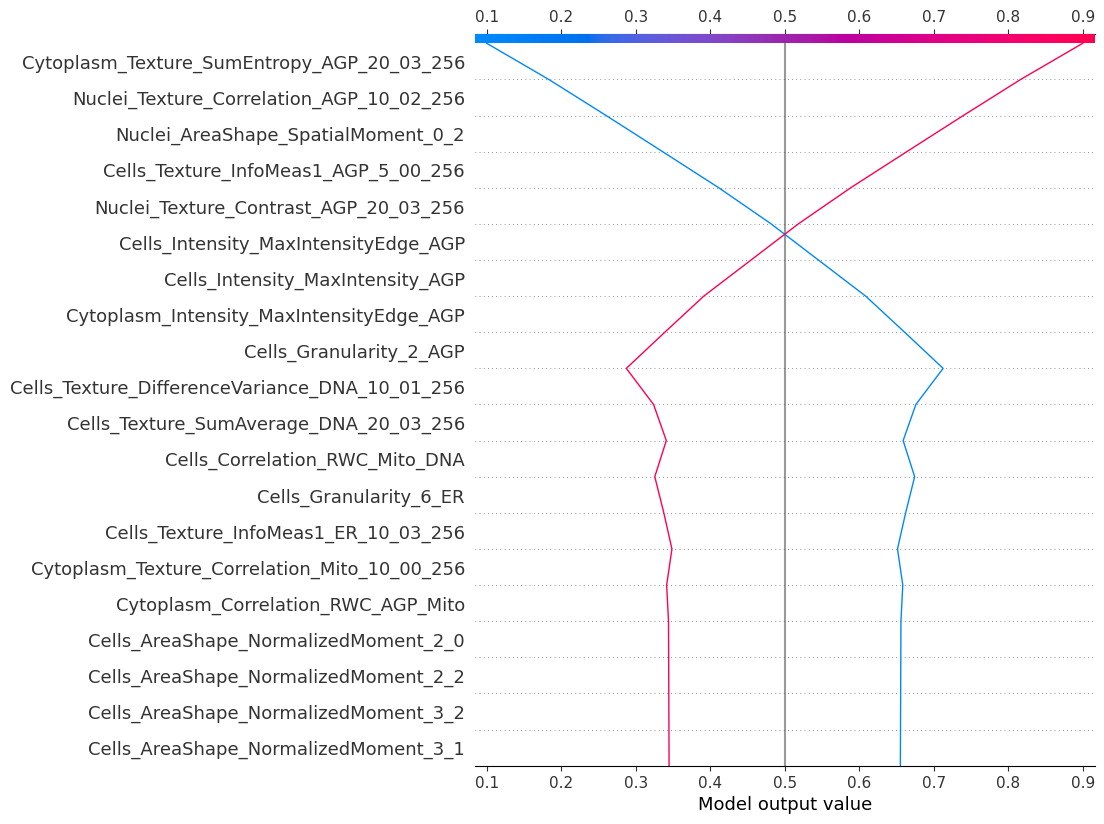

In [69]:
df_list = []
for t in timepoints:
    shap_values, X_train, model = random_forest_utils.random_forest_model_eval(df, 
                                                                    target = "Metadata_Compound", 
                                                                    ccp = 0.08, 
                                                                    n_estimators=10, 
                                                                    max_depth=5, 
                                                                    slice = True, column_slice = "Metadata_Time", slice_to_value = t
                                                                    )
    classes_lst = model.classes_
    for c in range(len(classes_lst)):
        samples = len(shap_values[c])
        shap_values_mean = np.array(shap_values[c][range(samples-1)]).mean(axis=0)
        shap_importance = pd.Series(shap_values_mean, X_train.columns).abs().sort_values(ascending=False)
        df_temp = pd.DataFrame(shap_importance).reset_index().rename(columns={'index':f"{experiment}_{t}days_{classes_lst[c]}", 0:f"{experiment}_{t}days_{classes_lst[c]}_shap"})
        df_list.append(df_temp)

# 4. Save shap values and features to df and export

In [76]:
df_shap_values = pd.concat(df_list, axis="columns")

In [78]:
df_shap_values.head(10)

,time_negcons_vs_treatments_1days_AgNP,time_negcons_vs_treatments_1days_AgNP_shap,time_negcons_vs_treatments_1days_Non-treated,time_negcons_vs_treatments_1days_Non-treated_shap,time_negcons_vs_treatments_15days_AgNP,time_negcons_vs_treatments_15days_AgNP_shap,time_negcons_vs_treatments_15days_Non-treated,time_negcons_vs_treatments_15days_Non-treated_shap,time_negcons_vs_treatments_30days_AgNP,time_negcons_vs_treatments_30days_AgNP_shap,time_negcons_vs_treatments_30days_Non-treated,time_negcons_vs_treatments_30days_Non-treated_shap
0,Nuclei_Texture_Contrast_AGP_20_03_256,0.017100,Nuclei_Texture_Contrast_AGP_20_03_256,0.017100,Cells_RadialDistribution_FracAtD_DNA_2of4,0.015368,Cells_RadialDistribution_FracAtD_DNA_2of4,0.015368,Cytoplasm_Correlation_RWC_AGP_Mito,0.008766,Cytoplasm_Correlation_RWC_AGP_Mito,0.008766
1,Nuclei_Texture_InfoMeas1_AGP_10_02_256,0.015368,Nuclei_Texture_InfoMeas1_AGP_10_02_256,0.015368,Nuclei_Granularity_10_AGP,0.009404,Nuclei_Granularity_10_AGP,0.009404,Cells_Granularity_2_AGP,0.008485,Cells_Granularity_2_AGP,0.008485
2,Cytoplasm_Texture_InfoMeas2_AGP_10_00_256,0.009610,Cytoplasm_Texture_InfoMeas2_AGP_10_00_256,0.009610,Cytoplasm_Granularity_3_ER,0.007089,Cytoplasm_Granularity_3_ER,0.007089,Nuclei_Texture_Contrast_AGP_20_03_256,0.007251,Nuclei_Texture_Contrast_AGP_20_03_256,0.007251
3,Cells_Intensity_StdIntensityEdge_AGP,0.008182,Cells_Intensity_StdIntensityEdge_AGP,0.008182,Cells_Texture_InfoMeas1_DNA_5_01_256,0.006960,Cells_Texture_InfoMeas1_DNA_5_01_256,0.006960,Cells_Intensity_MaxIntensityEdge_AGP,0.006494,Cells_Intensity_MaxIntensityEdge_AGP,0.006494
4,Cytoplasm_Granularity_3_AGP,0.007424,Cytoplasm_Granularity_3_AGP,0.007424,Cytoplasm_Texture_InfoMeas2_AGP_20_02_256,0.006669,Cytoplasm_Texture_InfoMeas2_AGP_20_02_256,0.006669,Cells_Correlation_RWC_Mito_DNA,0.005423,Cells_Correlation_RWC_Mito_DNA,0.005423
5,Cells_RadialDistribution_RadialCV_AGP_4of4,0.006965,Cells_RadialDistribution_RadialCV_AGP_4of4,0.006965,Nuclei_Texture_InfoMeas2_Mito_20_01_256,0.006614,Nuclei_Texture_InfoMeas2_Mito_20_01_256,0.006614,Cells_Texture_InfoMeas1_AGP_5_00_256,0.004897,Cells_Texture_InfoMeas1_AGP_5_00_256,0.004897
6,Nuclei_Texture_InfoMeas1_AGP_5_02_256,0.006494,Nuclei_Texture_InfoMeas1_AGP_5_02_256,0.006494,Nuclei_Granularity_8_Mito,0.006602,Nuclei_Granularity_8_Mito,0.006602,Cells_Texture_InfoMeas1_ER_10_03_256,0.004870,Cells_Texture_InfoMeas1_ER_10_03_256,0.004870
7,Nuclei_Correlation_Overlap_ER_Mito,0.005806,Nuclei_Correlation_Overlap_ER_Mito,0.005806,Nuclei_Granularity_3_ER,0.006169,Nuclei_Granularity_3_ER,0.006169,Cytoplasm_Intensity_MaxIntensityEdge_AGP,0.003908,Cytoplasm_Intensity_MaxIntensityEdge_AGP,0.003908
8,Cytoplasm_Texture_Correlation_Mito_20_03_256,0.004913,Cytoplasm_Texture_Correlation_Mito_20_03_256,0.004913,Nuclei_Intensity_MinIntensityEdge_AGP,0.005137,Nuclei_Intensity_MinIntensityEdge_AGP,0.005137,Cytoplasm_Texture_Correlation_Mito_10_00_256,0.003853,Cytoplasm_Texture_Correlation_Mito_10_00_256,0.003853
9,Nuclei_Intensity_MinIntensityEdge_AGP,0.003074,Nuclei_Intensity_MinIntensityEdge_AGP,0.003074,Nuclei_Intensity_MassDisplacement_AGP,0.005132,Nuclei_Intensity_MassDisplacement_AGP,0.005132,Cells_Texture_SumAverage_DNA_20_03_256,0.003401,Cells_Texture_SumAverage_DNA_20_03_256,0.003401


In [86]:
output = fr"C:\Users\Fer\Documents\GitHub\2023_01_04_AgNPContinuousAcute_fossa_Cimini\analysis\{project}\random_forest\feature_importance_outputs"
filename = f"{project}_{experiment}_features.csv"
out = os.path.join(output, filename)
df_shap_values.to_csv(out, index=False)